In [215]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
#image , name , mask
raw_dataset = tf.data.TFRecordDataset("C:/Users/JLK01/Downloads/archive (2)/content/tfrecs/train/0001_0001.tfrec")

for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(example)

features {
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\000\000\001\000\001\000\000\377\333\000C\000\002\001\001\002\001\001\002\002\002\002\002\002\002\002\003\005\003\003\003\003\003\006\004\004\003\005\007\006\007\007\007\006\007\007\010\t\013\t\010\010\n\010\007\007\n\r\n\n\013\014\014\014\014\007\t\016\017\r\014\016\013\014\014\014\377\333\000C\001\002\002\002\003\003\003\006\003\003\006\014\010\007\010\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\014\377\300\000\021\010\002\000\002\000\003\001\"\000\002\021\001\003\021\001\377\304\000\037\000\000\001\005\001\001\001\001\001\001\000\000\000\000\000\000\000\000\001\002\003\004\005\006\007\010\t\n\013\377\304\000\265\020\000\002\001\003\003\002\004\003\005\005\004\004\000\000\001}\001\002\003\000\004\021\005\022!1

In [216]:
import glob
train_files = glob.glob("C:/Users/JLK01/Downloads/archive (2)/content/tfrecs/train/*.tfrec")
val_files = glob.glob("C:/Users/JLK01/Downloads/archive (2)/content/tfrecs/val/*.tfrec")

In [233]:
print(train_files[:5])
print(val_files[:5])
# Create a dictionary describing the features.
train_feature_description = {
    'image': tf.io.FixedLenFeature([], tf.string),
    'mask': tf.io.FixedLenFeature([], tf.string),
    'name': tf.io.FixedLenFeature([], tf.string),
}






['C:/Users/JLK01/Downloads/archive (2)/content/tfrecs/train\\0001_0001.tfrec', 'C:/Users/JLK01/Downloads/archive (2)/content/tfrecs/train\\0001_0002.tfrec', 'C:/Users/JLK01/Downloads/archive (2)/content/tfrecs/train\\0001_0003.tfrec', 'C:/Users/JLK01/Downloads/archive (2)/content/tfrecs/train\\0001_0004.tfrec', 'C:/Users/JLK01/Downloads/archive (2)/content/tfrecs/train\\0001_0005.tfrec']
['C:/Users/JLK01/Downloads/archive (2)/content/tfrecs/val\\0015_0001.tfrec', 'C:/Users/JLK01/Downloads/archive (2)/content/tfrecs/val\\0015_0002.tfrec', 'C:/Users/JLK01/Downloads/archive (2)/content/tfrecs/val\\0015_0003.tfrec', 'C:/Users/JLK01/Downloads/archive (2)/content/tfrecs/val\\0015_0004.tfrec', 'C:/Users/JLK01/Downloads/archive (2)/content/tfrecs/val\\0015_0005.tfrec']


In [218]:
def _parse_image_function(example_proto):
 return tf.io.parse_single_example(example_proto, train_feature_description)

In [219]:
from io import BytesIO


In [220]:
train_names = []
train_masks = []
train_images = []
for i in train_files:
    train_image_dataset = tf.data.TFRecordDataset(i)
    train_image_dataset = train_image_dataset.map(_parse_image_function)

    images = [image_features['image'].numpy() for image_features in train_image_dataset]
    train_images = train_images +images
    masks = [mask_features['mask'].numpy() for mask_features in train_image_dataset]
    train_masks = train_masks + masks
    names = [name_features['name'].numpy()[2:-1] for name_features in train_image_dataset] # [2:-1] is done to remove b' from 1st and 'from last in train id names
    train_names = train_names + names


In [221]:
len(train_images)

19535

c:\Users\JLK01\miniconda3\envs\zxzxk0\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


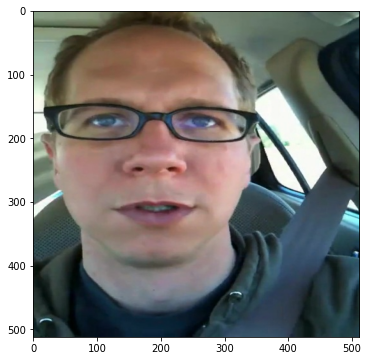

In [222]:
encoded_img = np.fromstring(train_images[3], dtype = np.uint8)
img = cv2.imdecode(encoded_img, cv2.IMREAD_COLOR)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.imshow(img)
#display.display(display.Image(data=train_images[55]))

c:\Users\JLK01\miniconda3\envs\zxzxk0\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


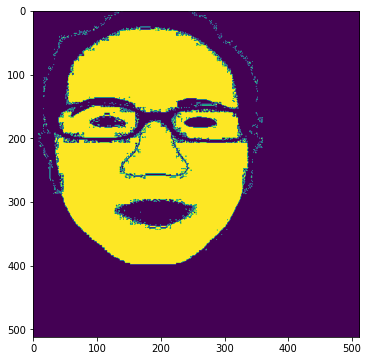

In [223]:
import IPython.display as display
encoded_img = np.fromstring(train_masks[3], dtype = np.uint8)
img = cv2.imdecode(encoded_img, cv2.IMREAD_COLOR)
img[np.where(img[:,:,0] == 6)] = 1
img=(img[:,:,0] == 1)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.imshow(img)
#display.display(display.Image(data=train_masks[55]))

In [226]:
path = "C:/Users/JLK01/Desktop/convert_mask"
org_path = "C:/Users/JLK01/Desktop/convert_image"
for i in range (19535):

    encoded_img = np.fromstring(train_masks[i], dtype = np.uint8)
    img = cv2.imdecode(encoded_img, cv2.IMREAD_COLOR)
    img[np.where(img[:,:,0] == 6)] = 1
    img[np.where(img[:,:,0] != 1)] = 0
    img = img.astype(int)   

    encoded_img = np.fromstring(train_images[i], dtype = np.uint8)
    org_img = cv2.imdecode(encoded_img, cv2.IMREAD_COLOR)
    org_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(os.path.join(org_path, '{0:04d}.png'.format(i)),org_img)
    
    b,g,r=cv2.split(img)
    cv2.imwrite(os.path.join(path, '{0:04d}.png'.format(i)),b*255)


c:\Users\JLK01\miniconda3\envs\zxzxk0\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """
c:\Users\JLK01\miniconda3\envs\zxzxk0\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


In [238]:
val_feature_description = {
    'image': tf.io.FixedLenFeature([], tf.string),
    'mask': tf.io.FixedLenFeature([], tf.string),
    'name': tf.io.FixedLenFeature([], tf.string),
}

In [239]:
def _parse_image_function(example_proto):
 return tf.io.parse_single_example(example_proto, val_feature_description)

In [242]:
val_names = []
val_masks = []
val_images = []
for i in val_files:
    val_image_dataset = tf.data.TFRecordDataset(i)
    val_image_dataset = val_image_dataset.map(_parse_image_function)

    images = [image_features['image'].numpy() for image_features in val_image_dataset]
    val_images = val_images +images
    masks = [mask_features['mask'].numpy() for mask_features in val_image_dataset]
    val_masks = val_masks + masks
    names = [name_features['name'].numpy()[2:-1] for name_features in val_image_dataset] # [2:-1] is done to remove b' from 1st and 'from last in train id names
    val_names = val_names + names


In [243]:
path = "C:/Users/JLK01/Desktop/val_convert_mask"
org_path = "C:/Users/JLK01/Desktop/val_convert_image"
for i in range (2653):

    encoded_img = np.fromstring(val_masks[i], dtype = np.uint8)
    img = cv2.imdecode(encoded_img, cv2.IMREAD_COLOR)
    img[np.where(img[:,:,0] == 6)] = 1
    img[np.where(img[:,:,0] != 1)] = 0
    img = img.astype(int)   

    encoded_img = np.fromstring(val_images[i], dtype = np.uint8)
    org_img = cv2.imdecode(encoded_img, cv2.IMREAD_COLOR)
    org_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(os.path.join(org_path, '{0:04d}.png'.format(i)),org_img)
    
    b,g,r=cv2.split(img)
    cv2.imwrite(os.path.join(path, '{0:04d}.png'.format(i)),b*255)


c:\Users\JLK01\miniconda3\envs\zxzxk0\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """
c:\Users\JLK01\miniconda3\envs\zxzxk0\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()
